<a href="https://colab.research.google.com/github/smatv/Application-of-time-series-algorithms-for-container-imbalance-forecasting-using-event-data/blob/main/Time_Series_Analysis_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd

df = pd.read_csv('/content/full_weekly_df.csv')


In [83]:
df.dtypes



weekyear          object
Equipment Type    object
Container Size     int64
Location          object
Export Units       int64
Import Units       int64
Imbalance          int64
dtype: object

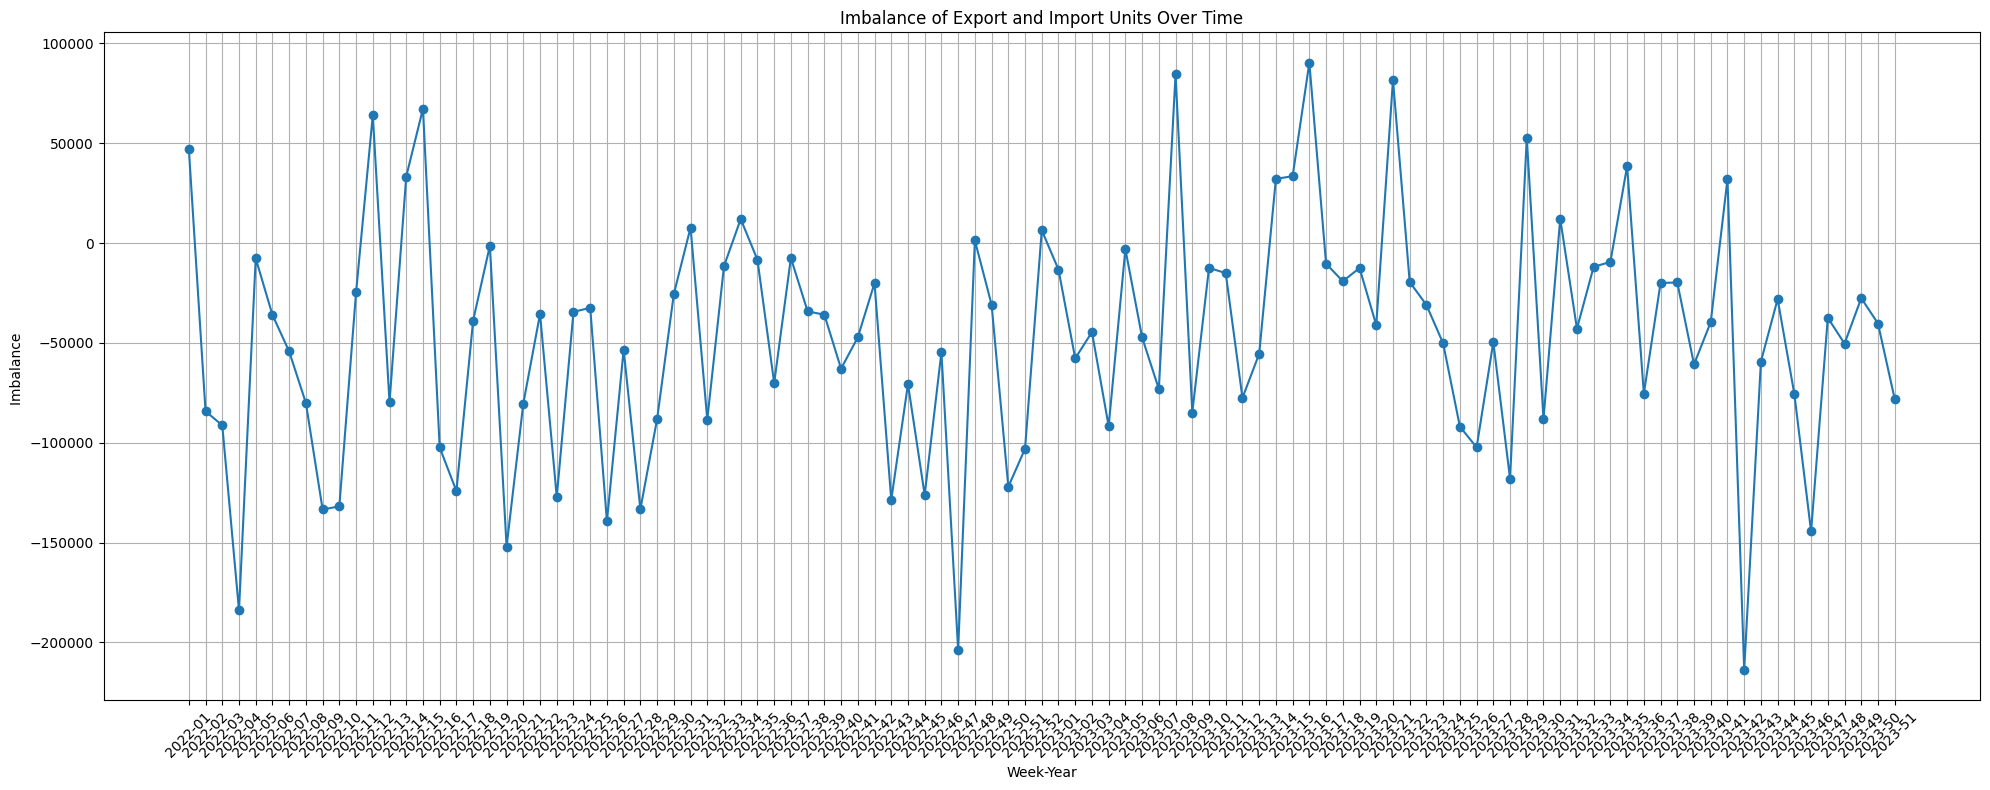

In [97]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Group by 'weekyear' and summarize
df_grouped = df.groupby('weekyear').agg({
    'Export Units': 'sum',
    'Import Units': 'sum',
    'Imbalance': 'sum'
}).reset_index()

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(df_grouped['weekyear'], df_grouped['Imbalance'], marker='o', linestyle='-')
plt.title('Imbalance of Export and Import Units Over Time')
plt.xlabel('Week-Year')
plt.ylabel('Imbalance ')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
df_grouped.describe()

,Export Units,Import Units,Imbalance
count,103.000000,103.000000,103.000000
mean,580080.310680,533044.038835,-47036.271845
std,56606.306495,61180.285666,59533.707939
min,426560.000000,330992.000000,-213648.000000
25%,548520.000000,501120.000000,-82280.000000
50%,579056.000000,539488.000000,-41040.000000
75%,607784.000000,569800.000000,-12096.000000
max,747904.000000,686560.000000,90384.000000


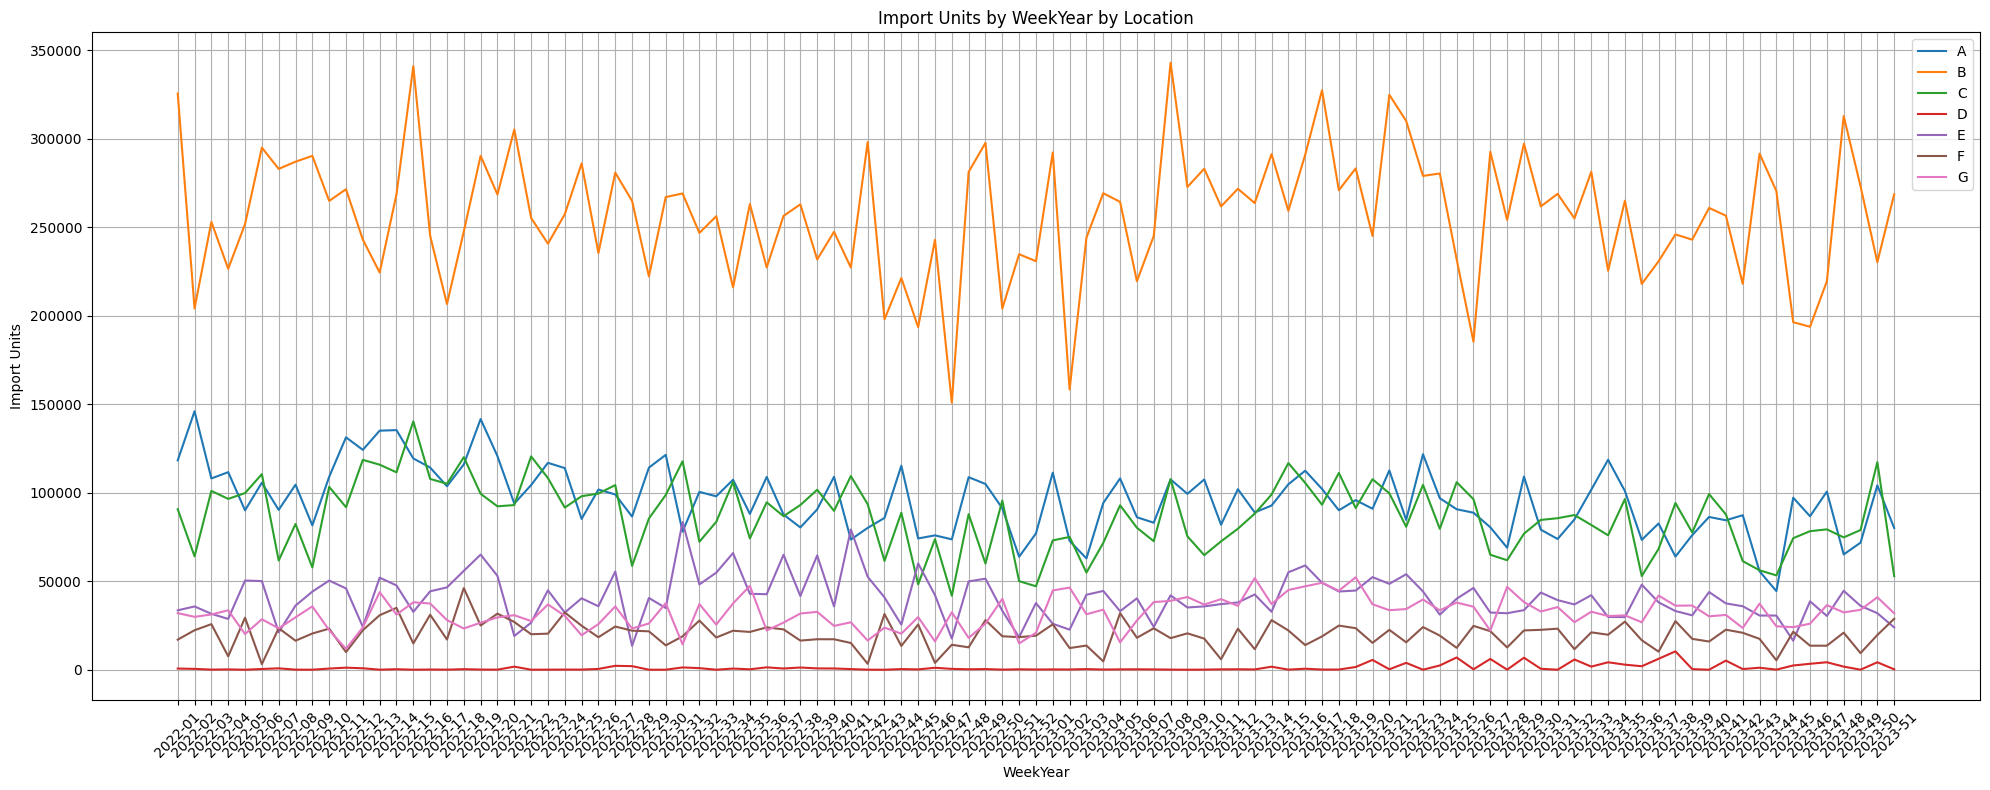

In [2]:
import matplotlib.pyplot as plt
# Grouping the data by Location and WeekYear, summing the Import Units
grouped_data = df.groupby(['Location', 'weekyear'])['Import Units'].sum()

# Plotting the data for each location
plt.figure(figsize=(20, 8))  # Adjust figure size as needed
for location, data in grouped_data.groupby(level=0):
    plt.plot(data.index.get_level_values('weekyear'), data.values, label=location)

# Adding labels and legend
plt.title('Import Units by WeekYear by Location')
plt.xlabel('WeekYear')
plt.ylabel('Import Units')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

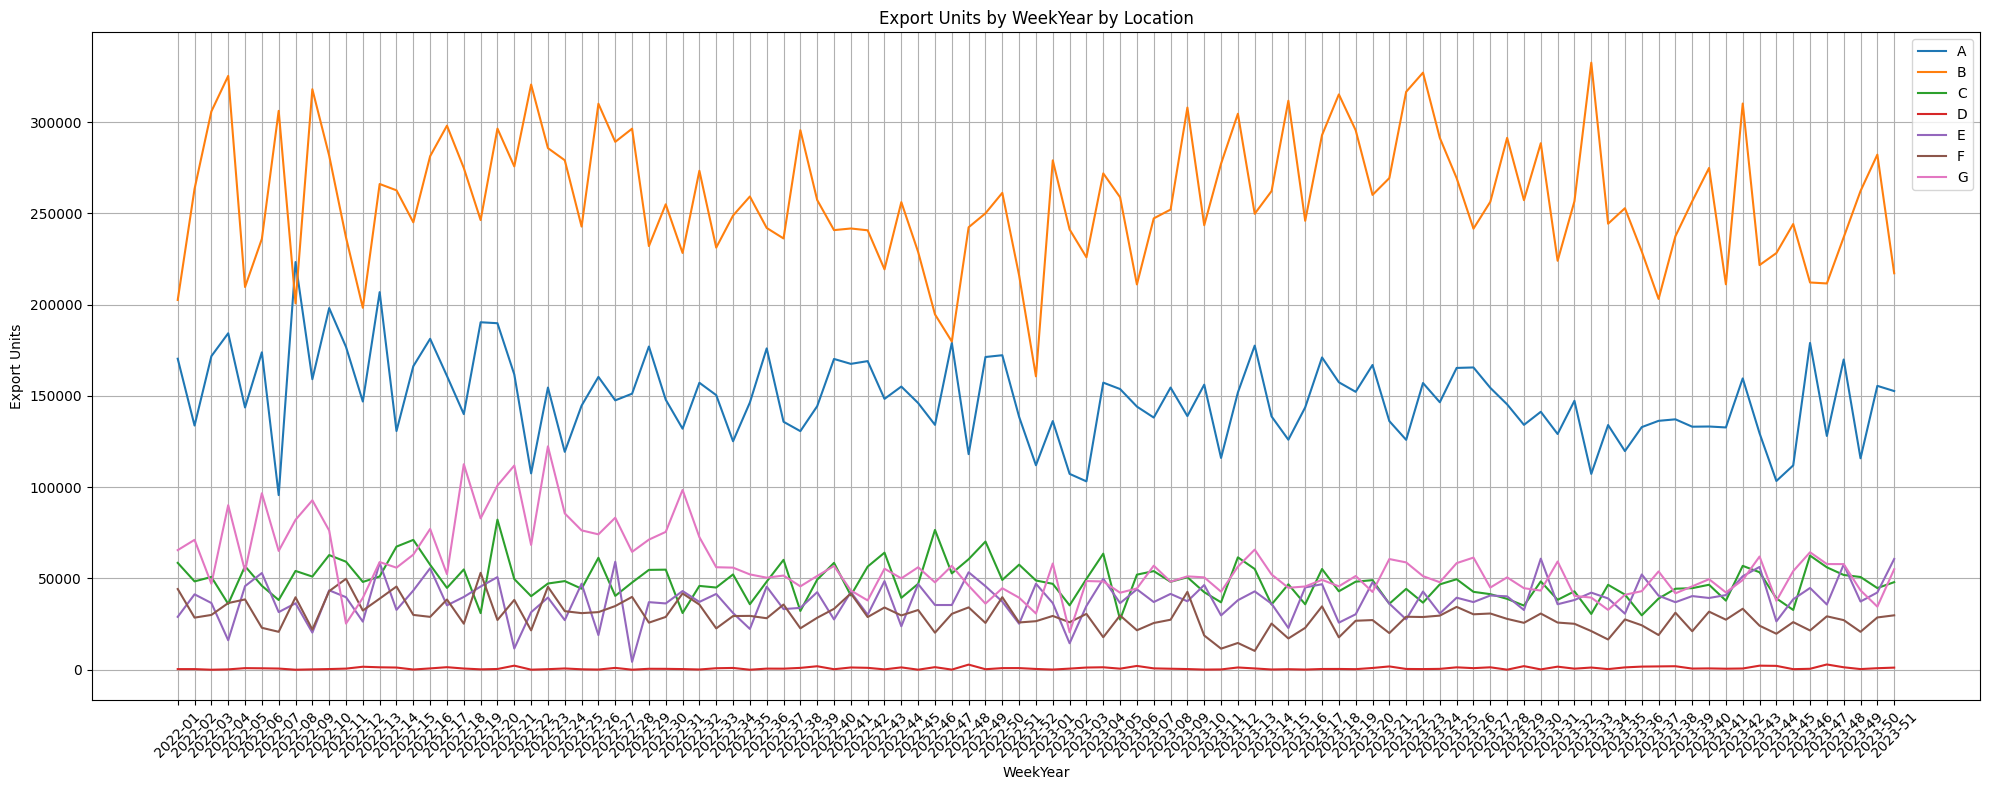

In [3]:
# Grouping the data by Location and WeekYear, summing the Import Units
grouped_data = df.groupby(['Location', 'weekyear'])['Export Units'].sum()

# Plotting the data for each location
plt.figure(figsize=(20, 8))  # Adjust figure size as needed
for location, data in grouped_data.groupby(level=0):
    plt.plot(data.index.get_level_values('weekyear'), data.values, label=location)

# Adding labels and legend
plt.title('Export Units by WeekYear by Location')
plt.xlabel('WeekYear')
plt.ylabel('Export Units')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

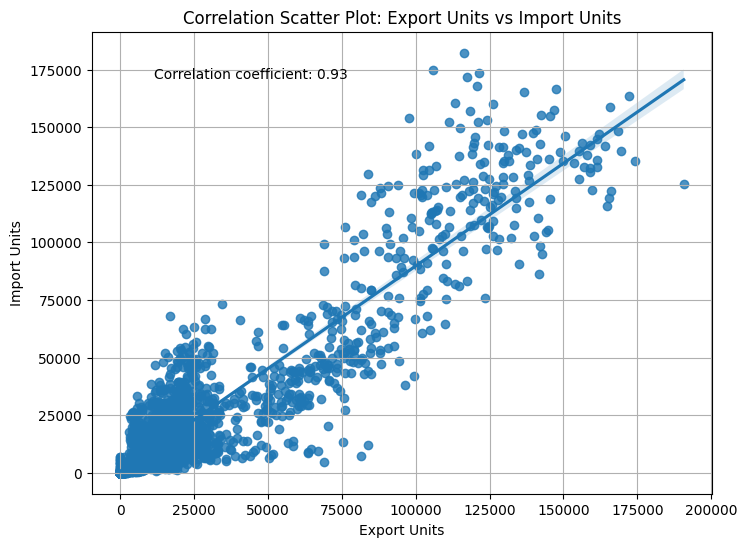

In [4]:
import seaborn as sns

# Plotting the scatter plot with regression line
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.regplot(data=df, x='Export Units', y='Import Units')
plt.title('Correlation Scatter Plot: Export Units vs Import Units')
plt.xlabel('Export Units')
plt.ylabel('Import Units')

# Calculate correlation coefficient
correlation_coefficient = df['Export Units'].corr(df['Import Units'])
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)

# Show plot
plt.grid(True)
plt.show()

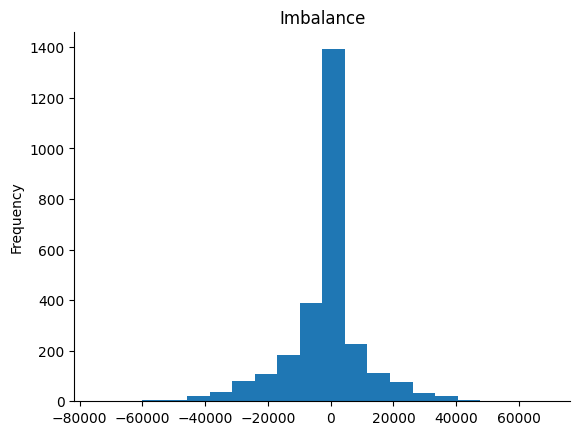

In [5]:
# @title Imbalance

from matplotlib import pyplot as plt
df['Imbalance'].plot(kind='hist', bins=20, title='Imbalance')
plt.gca().spines[['top', 'right',]].set_visible(False)

If the p-value from the ADF test for the 'Imbalance' column is less than 0.05, it indicates that we reject the null hypothesis of the time series being non-stationary. In such cases, we can perform differencing on the 'Imbalance' column and then conduct the ADF test again to check if the differenced series is stationary. Here's how you can modify the code to achieve that:

The Mean Absolute Scaled Error (MASE) is a measure of forecast accuracy relative to a naive forecast. The MASE compares the mean absolute error (MAE) of the forecasted values to the MAE of a naive forecast (often a simple lag or seasonal naive forecast).

Interpreting the MASE score:

MASE < 1: The forecast is better than the naive forecast. A value less than 1 indicates that the forecast is more accurate on average compared to a naive forecast. In your case, an average MASE score of 0.69 suggests that, on average, the forecasting model performs better than the naive forecast.

MASE = 1: The forecast is as accurate as the naive forecast. A value of 1 indicates that the forecast accuracy is comparable to that of a naive forecast.

MASE > 1: The forecast is worse than the naive forecast. A value greater than 1 indicates that the forecast is less accurate on average compared to a naive forecast.

So, an average MASE score of 0.69 across all splits suggests that, on average, your forecasting model provides forecasts that are approximately 69% as accurate as a naive forecast. In other words, the model's forecasts are generally better than a simple naive forecast, which is a positive indication of its performance. However, the interpretation may also depend on the specific context and requirements of your forecasting task.

In [6]:
!pip install sktime
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.1/130.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 22.6 MB/s eta 0:00:00


In [7]:
from sktime.forecasting.arima import AutoARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import VAR, VECM
import numpy as np


In [8]:
def forecast_test(data, min_window_size = 92, TEST_SIZE = 6):

  # Convert the index to datetime format
  data.index = pd.to_datetime(data.index + '-1', format='%Y-%W-%w')

  start_week = data.index.min() + pd.DateOffset(weeks=min_window_size)
  print(f"Start week: {start_week}")
  end_week = data.index.max()-pd.DateOffset(weeks=TEST_SIZE)
  print(f"End week: {end_week}")
  weeks = pd.date_range(start_week, end_week, freq='W-MON')
  print(f"Training sets: {len(weeks)}")

  df_target = data[["Imbalance"]]
  print("Training Started")
  print("---------------------------")

  import warnings
  warnings.filterwarnings('ignore')

  df_metrics = pd.DataFrame()

  for week in weeks:

      training = data.query("index<@week")
      train1var = training[["Imbalance"]]
      train2var = training[["Imbalance", "Import Units"]]
      train2var2 = training[["Imbalance", "Export Units"]]
      train3var = training[["Imbalance", "Import Units", "Export Units"]]

      prediction_index = pd.date_range(week+pd.DateOffset(weeks=1), week+pd.DateOffset(weeks=TEST_SIZE), freq='W-MON')

      # Fit AutoARIMA1 model
      model = auto_arima(train1var[["Imbalance"]], min_q=1, min_p=1, d=1, seasonal=True)
      prediction = model.predict(n_periods=TEST_SIZE)
      prediction.index = prediction_index
      prediction = prediction.reset_index().rename(columns={'index': 'week'})
      prediction.rename(columns={ 0 : 'Imbalance'}, inplace = True)
      prediction["horizon"] = "fh"+(prediction.index+1).astype(str)
      prediction["model"] = "ARIMA1"
      df_metrics = pd.concat([df_metrics, prediction])


      # Fit AutoARIMA2 model

      Xtrain = train2var[["Import Units"]][:-1]
      Xtest = pd.concat([train2var[["Import Units"]][-1:],
          AutoARIMA(suppress_warnings=True).fit(Xtrain).predict(fh=np.arange(1, TEST_SIZE+2))])
      y = train2var[["Imbalance"]][1:]
      Xtrain.index = y.index
      forecaster = AutoARIMA()
      model = forecaster.fit(y, X=Xtrain)
      prediction = model.predict(fh=np.arange(1, TEST_SIZE+1), X=Xtest)
      prediction.index = prediction_index
      prediction = prediction.reset_index().rename(columns={'index': 'week'})
      prediction["horizon"] = "fh"+(prediction.index+1).astype(str)
      prediction["model"] = "ARIMA2"
      df_metrics = pd.concat([df_metrics, prediction])


      # Fit AutoARIMA3 model
      Xtrain = train3var[["Import Units" , "Export Units"]][:-1]
      Xtest = pd.concat([train3var[["Import Units" , "Export Units"]][-1:],AutoARIMA(suppress_warnings=True).fit(Xtrain[["Import Units"]]).predict(fh=np.arange(1, TEST_SIZE+2)).join(
              AutoARIMA(suppress_warnings=True).fit(Xtrain[["Export Units"]]).predict(fh=np.arange(1, TEST_SIZE+2)))])
      y = train3var[["Imbalance"]][1:]
      Xtrain.index = y.index
      forecaster = AutoARIMA()
      model = forecaster.fit(y, X=Xtrain)
      prediction = model.predict(fh=np.arange(1, TEST_SIZE+1), X=Xtest)
      prediction.index = prediction_index
      prediction = prediction.reset_index().rename(columns={'index': 'week'})
      prediction["horizon"] = "fh"+(prediction.index+1).astype(str)
      prediction["model"] = "ARIMA3"
      df_metrics = pd.concat([df_metrics, prediction])


      # Fit SARIMA model
      sarima_model = SARIMAX(train2var['Imbalance'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
      sarima_fit = sarima_model.fit()
      prediction = sarima_fit.forecast(steps=TEST_SIZE)
      prediction = prediction.reset_index().rename(columns={'index': 'week'})
      prediction.rename(columns={'predicted_mean': 'Imbalance'}, inplace = True)
      prediction["horizon"] = "fh"+(prediction.index+1).astype(str)
      prediction["model"] = "SARIMA"
      df_metrics = pd.concat([df_metrics, prediction])


      # Fit Exponential Smoothing
      ets_model = ExponentialSmoothing(train2var['Imbalance']).fit()
      prediction = ets_model.forecast(steps=TEST_SIZE)
      prediction = prediction.reset_index().rename(columns={'index': 'week'})
      prediction.rename(columns={ 0 : 'Imbalance'}, inplace = True)
      prediction["horizon"] = "fh"+(prediction.index+1).astype(str)
      prediction["model"] = "ETS"
      df_metrics = pd.concat([df_metrics, prediction])


      # Vector Autoregression (VAR)
      var_model = VAR(train3var)
      var_model_fit = var_model.fit()
      var_forecast = var_model_fit.forecast(train3var.values[-var_model_fit.k_ar:], steps=TEST_SIZE)
      prediction = pd.DataFrame(var_forecast, index = prediction_index)
      prediction = prediction.reset_index().rename(columns={'index': 'week'})
      prediction.rename(columns={ 0 : 'Imbalance'}, inplace = True)
      prediction.drop(columns=[1, 2] , inplace=True)
      prediction["horizon"] = "fh"+(prediction.index+1).astype(str)
      prediction["model"] = "VAR3"
      df_metrics = pd.concat([df_metrics, prediction])


      # Vector Error Correction Model (VECM)
      vecm_model = VECM(train2var, k_ar_diff=1)
      vecm_model_fit = vecm_model.fit()
      vecm_forecast = vecm_model_fit.predict(steps=TEST_SIZE)
      prediction = pd.DataFrame(vecm_forecast, index = prediction_index)
      prediction = prediction.reset_index().rename(columns={'index': 'week'})
      prediction.rename(columns={ 0 : 'Imbalance'}, inplace = True)
      prediction.drop(columns=[1] , inplace=True)
      prediction["horizon"] = "fh"+(prediction.index+1).astype(str)
      prediction["model"] = "VECM1"
      df_metrics = pd.concat([df_metrics, prediction])

      # Vector Error Correction Model (VECM)
      vecm_model = VECM(train2var2, k_ar_diff=1)
      vecm_model_fit = vecm_model.fit()
      vecm_forecast = vecm_model_fit.predict(steps=TEST_SIZE)
      prediction = pd.DataFrame(vecm_forecast, index = prediction_index)
      prediction = prediction.reset_index().rename(columns={'index': 'week'})
      prediction.rename(columns={ 0 : 'Imbalance'}, inplace = True)
      prediction.drop(columns=[1] , inplace=True)
      prediction["horizon"] = "fh"+(prediction.index+1).astype(str)
      prediction["model"] = "VECM2"
      df_metrics = pd.concat([df_metrics, prediction])



  results = df_metrics.pivot_table('Imbalance', ['model', 'week'], 'horizon').reset_index()
  results = pd.merge(results, df_target.reset_index(), how="left", left_on=["week"], right_on=["weekyear"]).drop(
      columns=["weekyear"])


  return results





In [9]:
def mae(actual, predicted):

  # Calculate mean absolute error (MAE)
  mae = np.mean(np.abs(actual - predicted))

  return mae

In [10]:
def evaluate_mae(results):

  avg_mae = results.groupby("model").apply(
    lambda x: pd.Series({'MAE(h=1)': mae(x['Imbalance'], x['fh1']),
                         'MAE(h=2)': mae(x['Imbalance'], x['fh2']),
                         'MAE(h=3)': mae(x['Imbalance'], x['fh3']),
                         'MAE(h=4)': mae(x['Imbalance'], x['fh4']),
                         'MAE(h=5)': mae(x['Imbalance'], x['fh5']),
                         'MAE(h=6)': mae(x['Imbalance'], x['fh6'])})).round(1)
  return avg_mae

In [11]:
def mase(actual, predicted):

  # Calculate mean absolute error (MAE)
  mae = np.mean(np.abs(actual - predicted))

  # Calculate the naive forecast (lagged values)
  naive_forecast = actual.shift(1).values

  # Calculate mean absolute error of the naive forecast
  mae_naive = np.mean(np.abs(actual - naive_forecast))

  # Calculate MASE
  mase = mae / mae_naive

  return mase

In [12]:
def evaluate_mase(results):
  avg_mase = results.groupby("model").apply(
    lambda x: pd.Series({'MASE(h=1)': mase(x['Imbalance'], x['fh1']),
                         'MASE(h=2)': mase(x['Imbalance'], x['fh2']),
                         'MASE(h=3)': mase(x['Imbalance'], x['fh3']),
                         'MASE(h=4)': mase(x['Imbalance'], x['fh4']),
                         'MASE(h=5)': mase(x['Imbalance'], x['fh5']),
                         'MASE(h=6)': mase(x['Imbalance'], x['fh6'])})).round(2)
  return avg_mase

In [13]:
import pandas as pd
df = pd.read_csv('/content/full_weekly_df.csv')

In [14]:
# Grouping the data by 'Equipment Type', 'Container Size', and 'Location'
grouped_data = df.groupby(['Equipment Type', 'Container Size', 'Location'])

# Create an empty dictionary to store the resulting DataFrames
result_dfs = {}

# Iterate over each group and create a DataFrame for each
for (equipment_type, container_size, location), group_data in grouped_data:
    # Create a new DataFrame for the current group
    new_df = group_data.set_index('weekyear')[['Import Units', 'Export Units', 'Imbalance']]

    # Store the DataFrame in the dictionary with a unique key
    key = f"{equipment_type}_{container_size}_{location}"
    result_dfs[key] = new_df

# Now, result_dfs contains multiple DataFrames, each keyed by a unique combination of 'Equipment Type', 'Container Size', and 'Location'
# Unpack the dictionary to create separate variables for each DataFrame
for key, value in result_dfs.items():
    globals()[f'{key}'] = value

In [15]:
import numpy as np
import statsmodels.api as sm

# Iterate over each resulting DataFrame to perform time series analysis
for key, df in result_dfs.items():
  try:

    print(key)

    # 1. Descriptive Statistics
    print("Descriptive Statistics:")
    print(data.describe())

    print("---------------------------------")
    # 2. Time Series Visualization
    plt.figure(figsize=(20, 8))
    plt.plot(data.index, data['Import Units'], label='Import Units')
    plt.plot(data.index, data['Export Units'], label='Export Units')
    plt.plot(data.index, data['Imbalance'], label='Imbalance')
    plt.title('Time Series Visualization')
    plt.xlabel('Week Year')
    plt.ylabel('Units')
    plt.legend()
    plt.show()

    print("---------------------------------")

    # 3. Correlation Analysis
    print("Correlation Analysis:")
    print(data.corr())
    print("---------------------------------")


    # 4. Outlier Detection (Example using Z-score)
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = z_scores > 3  # Adjust the threshold (e.g., 3) for significance
    print("Outliers:")
    print(outliers.any())

    print("---------------------------------")
    '''
    # 5. Granger Causality Test
    from statsmodels.tsa.stattools import grangercausalitytests
    max_lag = 4

    print("Granger Causality Test Results Import - Imbalance:")
    granger_results_import = grangercausalitytests(data[['Imbalance', 'Import Units']], max_lag)


    print("Granger Causality Test Results Export - Imbalance:")
    granger_results_export = grangercausalitytests(data[['Imbalance', 'Export Units']], max_lag)

    print("---------------------------------")
    '''
    print(' ')
    print('################################')
    print(' ')
  except Exception as e:
    # Ignore the error and continue
    continue

Dry_20_A
Descriptive Statistics:
count       103.000000
mean      57022.135922
std       18484.094316
min       20512.000000
25%       44960.000000
50%       52224.000000
75%       63720.000000
max      122416.000000
Name: Export Units, dtype: float64
---------------------------------
Dry_20_B
Descriptive Statistics:
count       103.000000
mean      57022.135922
std       18484.094316
min       20512.000000
25%       44960.000000
50%       52224.000000
75%       63720.000000
max      122416.000000
Name: Export Units, dtype: float64
---------------------------------
Dry_20_C
Descriptive Statistics:
count       103.000000
mean      57022.135922
std       18484.094316
min       20512.000000
25%       44960.000000
50%       52224.000000
75%       63720.000000
max      122416.000000
Name: Export Units, dtype: float64
---------------------------------
Dry_20_D
Descriptive Statistics:
count       103.000000
mean      57022.135922
std       18484.094316
min       20512.000000
25%       44960.0

<ipython-input-15-766607ea9afb>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20, 8))


<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

In [ ]:

# Iterate over each resulting DataFrame to compare forecasting model performances
for key, df in result_dfs.items():
  try:
    print(key)
    results = forecast_test(df, min_window_size = 52)
    print(evaluate_mae(results))
    print(evaluate_mase(results))


    print(' ')
    print('################################')
    print(' ')

  except Exception as e:
    # Ignore the error and continue
    continue

Dry_20_A
Start week: 2023-01-02 00:00:00
End week: 2023-11-06 00:00:00
Training sets: 45
Training Started
---------------------------
        MAE(h=1)  MAE(h=2)  MAE(h=3)  MAE(h=4)  MAE(h=5)  MAE(h=6)
model                                                             
ARIMA1    8998.0    9041.3    8874.7    8800.9    9136.3    9510.5
ARIMA2    9493.1    9621.2   10164.1    9614.7    9843.2   10305.7
ARIMA3   11194.2    8799.1    9267.0    8594.7    9151.7    8769.3
ETS       7892.6    8778.2    8653.1    8878.9    8836.0    8777.4
SARIMA    8701.4    9376.7    9495.9    9583.3    9398.7    9226.2
VAR3      8160.2    8061.2    8688.7    8763.1    8730.1    8824.3
VECM1     9518.1    9744.5    9702.8    9335.1    9357.3    9476.0
VECM2     9518.1    9744.5    9702.8    9335.1    9357.3    9476.0
        MASE(h=1)  MASE(h=2)  MASE(h=3)  MASE(h=4)  MASE(h=5)  MASE(h=6)
model                                                                   
ARIMA1       0.89       0.90       0.88       0.88

In [46]:
import pandas as pd
df = pd.read_csv('/content/full_weekly_df.csv')

# Grouping the data by 'Location'
location_data = df.groupby(['Location'])

# Create an empty dictionary to store the resulting DataFrames
location_result_dfs = {}

# Iterate over each group and create a DataFrame for each
for (location), group_data in location_data:
    # Create a new DataFrame for the current
    new_df = group_data.set_index('weekyear')[['Import Units', 'Export Units', 'Imbalance']].reset_index()
    new_df = new_df.groupby(['weekyear']).agg({
    'Import Units': 'sum',
    'Export Units': 'sum',
    'Imbalance': 'sum'
    })
    new_df.fillna(0, inplace=True)

    # Store the DataFrame in the dictionary with a unique key
    key = location[0]
    location_result_dfs[key] = new_df


# Now, result_dfs contains multiple DataFrames, each keyed by a unique combination of 'Equipment Type', 'Container Size', and 'Location'
# Unpack the dictionary to create separate variables for each DataFrame
for key, value in location_result_dfs.items():
    globals()[f'{key}'] = value

In [18]:
location_result_dfs

{'A':           Import Units  Export Units  Imbalance
 weekyear                                       
 2022-01         118336        170400     -52064
 2022-02         146080        133792      12288
 2022-03         108112        171792     -63680
 2022-04         111664        184352     -72688
 2022-05          90080        143680     -53600
 ...                ...           ...        ...
 2023-47         100688        128080     -27392
 2023-48          65152        169984    -104832
 2023-49          71808        115840     -44032
 2023-50         104208        155536     -51328
 2023-51          80112        152688     -72576
 
 [103 rows x 3 columns],
 'B':           Import Units  Export Units  Imbalance
 weekyear                                       
 2022-01         325648        202592     123056
 2022-02         204208        263472     -59264
 2022-03         253104        305904     -52800
 2022-04         226608        325376     -98768
 2022-05         251840        2

In [47]:
# Iterate over each resulting Location DataFrame to compare forecasting model performances

model_performance = pd.DataFrame()

for key, df in location_result_dfs.items():

  try:

    print(key)
    analyze = forecast_test(df, min_window_size=52)
    models_mase = evaluate_mase(analyze)
    print(models_mase)

    # Calculate the mean of each row
    row_means = models_mase.mean(axis=1)
    # Create a new DataFrame with the row means
    average_model_mase = pd.DataFrame(row_means, columns=[f'Average MASE({key})'])

    # Calculate the mean of all values
    overall_mean = models_mase.values.mean()
    print('--------------------------------')
    print("The average of all values in the DataFrame is:", round(overall_mean,2))

    # Concatenate the results to the model_performance DataFrame
    model_performance = pd.concat([model_performance, average_model_mase], axis=1)


    print(' ')
    print('################################')
    print(' ')


  except Exception as e:
    # Ignore the error and continue
    continue

round(model_performance,2)

A
Start week: 2023-01-02 00:00:00
End week: 2023-11-06 00:00:00
Training sets: 45
Training Started
---------------------------
        MASE(h=1)  MASE(h=2)  MASE(h=3)  MASE(h=4)  MASE(h=5)  MASE(h=6)
model                                                                   
ARIMA1       0.83       0.84       0.83       0.85       0.83       0.83
ARIMA2       0.80       0.80       0.86       0.84       0.83       0.86
ARIMA3       0.97       0.83       0.80       0.84       0.86       0.83
ETS          0.78       0.81       0.82       0.82       0.81       0.80
SARIMA       0.90       0.91       0.91       0.90       0.93       0.91
VAR3         0.78       0.77       0.79       0.79       0.78       0.80
VECM1        0.79       0.78       0.85       0.84       0.84       0.84
VECM2        0.79       0.78       0.85       0.84       0.84       0.84
--------------------------------
The average of all values in the DataFrame is: 0.83
 
################################
 
B
Start week: 2023-01

,Average MASE(A),Average MASE(B),Average MASE(C),Average MASE(E),Average MASE(F),Average MASE(G)
model,,,,,,
ARIMA1,0.84,0.63,0.81,0.82,0.79,1.13
ARIMA2,0.83,0.60,0.83,0.90,0.78,1.16
ARIMA3,0.86,0.64,0.82,0.99,0.78,1.40
ETS,0.81,0.61,0.84,0.79,0.78,0.97
SARIMA,0.91,0.67,0.95,1.01,0.87,1.38
VAR3,0.78,0.61,0.79,0.96,0.80,1.55
VECM1,0.82,0.62,0.76,0.96,0.76,1.28
VECM2,0.82,0.62,0.76,0.96,0.76,1.28


In [48]:
round(model_performance,2)

,Average MASE(A),Average MASE(B),Average MASE(C),Average MASE(E),Average MASE(F),Average MASE(G)
model,,,,,,
ARIMA1,0.84,0.63,0.81,0.82,0.79,1.13
ARIMA2,0.83,0.60,0.83,0.90,0.78,1.16
ARIMA3,0.86,0.64,0.82,0.99,0.78,1.40
ETS,0.81,0.61,0.84,0.79,0.78,0.97
SARIMA,0.91,0.67,0.95,1.01,0.87,1.38
VAR3,0.78,0.61,0.79,0.96,0.80,1.55
VECM1,0.82,0.62,0.76,0.96,0.76,1.28
VECM2,0.82,0.62,0.76,0.96,0.76,1.28


In [52]:
import pandas as pd
df = pd.read_csv('/content/full_weekly_df.csv')

# Grouping the data by 'Size'
size_data = df.groupby(['Container Size'])

# Create an empty dictionary to store the resulting DataFrames
size_result_dfs = {}

# Iterate over each group and create a DataFrame for each
for (size), group_data in size_data:
    # Create a new DataFrame for the current
    new_df = group_data.set_index('weekyear')[['Import Units', 'Export Units', 'Imbalance']].reset_index()
    new_df = new_df.groupby(['weekyear']).agg({
    'Import Units': 'sum',
    'Export Units': 'sum',
    'Imbalance': 'sum'
    })
    new_df.fillna(0, inplace=True)

    # Store the DataFrame in the dictionary with a unique key
    key = f"_{size[0]}_"
    size_result_dfs[key] = new_df


# Now, result_dfs contains multiple DataFrames, each keyed by a unique combination of 'Equipment Type', 'Container Size', and 'Location'
# Unpack the dictionary to create separate variables for each DataFrame
for key, value in size_result_dfs.items():
    globals()[f'{key}'] = value

In [53]:
_20_

,Import Units,Export Units,Imbalance
weekyear,,,
2022-01,241344,241648,-304
2022-02,205840,255504,-49664
2022-03,210016,270032,-60016
2022-04,191376,305056,-113680
2022-05,212704,213328,-624
...,...,...,...
2023-47,177520,204096,-26576
2023-48,202128,247824,-45696
2023-49,192048,212080,-20032


In [54]:
size_result_dfs

{'_20_':           Import Units  Export Units  Imbalance
 weekyear                                       
 2022-01         241344        241648       -304
 2022-02         205840        255504     -49664
 2022-03         210016        270032     -60016
 2022-04         191376        305056    -113680
 2022-05         212704        213328       -624
 ...                ...           ...        ...
 2023-47         177520        204096     -26576
 2023-48         202128        247824     -45696
 2023-49         192048        212080     -20032
 2023-50         212176        235680     -23504
 2023-51         181360        219392     -38032
 
 [103 rows x 3 columns],
 '_40_':           Import Units  Export Units  Imbalance
 weekyear                                       
 2022-01         376576        328944      47632
 2022-02         296976        331520     -34544
 2022-03         340928        372144     -31216
 2022-04         313472        383744     -70272
 2022-05         329024   

In [55]:
# Iterate over each resulting Size DataFrame to compare forecasting model performances

size_model_performance = pd.DataFrame()

for key, df in size_result_dfs.items():

  try:

    print(key)
    analyze = forecast_test(df, min_window_size=52)
    models_mase = evaluate_mase(analyze)
    print(models_mase)

    # Calculate the mean of each row
    row_means = models_mase.mean(axis=1)
    # Create a new DataFrame with the row means
    average_model_mase = pd.DataFrame(row_means, columns=[f'Average MASE({key})'])
    print(round(average_model_mase,2))

    # Calculate the mean of all values
    overall_mean = models_mase.values.mean()
    print('--------------------------------')
    print("The average of all values in the DataFrame is:", round(overall_mean,2))

    # Concatenate the results to the model_performance DataFrame
    size_model_performance = pd.concat([size_model_performance, average_model_mase], axis=1)


    print(' ')
    print('################################')
    print(' ')


  except Exception as e:
    # Ignore the error and continue
    continue

round(size_model_performance,2)

_20_
Start week: 2023-01-02 00:00:00
End week: 2023-11-06 00:00:00
Training sets: 45
Training Started
---------------------------
        MASE(h=1)  MASE(h=2)  MASE(h=3)  MASE(h=4)  MASE(h=5)  MASE(h=6)
model                                                                   
ARIMA1       0.74       0.77       0.76       0.77       0.74       0.73
ARIMA2       0.79       0.82       0.81       0.80       0.82       0.83
ARIMA3       0.78       0.82       0.81       0.80       0.81       0.82
ETS          0.72       0.74       0.75       0.75       0.76       0.76
SARIMA       0.81       0.81       0.84       0.84       0.82       0.82
VAR3         0.77       0.75       0.76       0.77       0.76       0.76
VECM1        0.79       0.78       0.77       0.77       0.75       0.77
VECM2        0.79       0.78       0.77       0.77       0.75       0.77
        Average MASE(_20_)
model                     
ARIMA1                0.75
ARIMA2                0.81
ARIMA3                0.81
ETS  

,Average MASE(_20_),Average MASE(_40_)
model,,
ARIMA1,0.75,0.71
ARIMA2,0.81,0.69
ARIMA3,0.81,0.68
ETS,0.75,0.71
SARIMA,0.82,0.81
VAR3,0.76,0.69
VECM1,0.77,0.68
VECM2,0.77,0.68


In [56]:
import pandas as pd
df = pd.read_csv('/content/full_weekly_df.csv')

# Grouping the data by 'Type'
type_data = df.groupby(['Equipment Type'])

# Create an empty dictionary to store the resulting DataFrames
type_result_dfs = {}

# Iterate over each group and create a DataFrame for each
for (type), group_data in type_data:
    # Create a new DataFrame for the current
    new_df = group_data.set_index('weekyear')[['Import Units', 'Export Units', 'Imbalance']].reset_index()
    new_df = new_df.groupby(['weekyear']).agg({
    'Import Units': 'sum',
    'Export Units': 'sum',
    'Imbalance': 'sum'
    })
    new_df.fillna(0, inplace=True)

    # Store the DataFrame in the dictionary with a unique key
    key = f"_{type[0]}_"
    type_result_dfs[key] = new_df


# Now, result_dfs contains multiple DataFrames, each keyed by a unique combination of 'Equipment Type', 'Container Size', and 'Location'
# Unpack the dictionary to create separate variables for each DataFrame
for key, value in type_result_dfs.items():
    globals()[f'{key}'] = value


# Iterate over each resulting type DataFrame to compare forecasting model performances

type_model_performance = pd.DataFrame()

for key, df in type_result_dfs.items():

  try:

    print(key)
    analyze = forecast_test(df, min_window_size=52)
    models_mase = evaluate_mase(analyze)
    print(models_mase)

    # Calculate the mean of each row
    row_means = models_mase.mean(axis=1)
    # Create a new DataFrame with the row means
    average_model_mase = pd.DataFrame(row_means, columns=[f'Average MASE({key})'])
    print(round(average_model_mase,2))

    # Calculate the mean of all values
    overall_mean = models_mase.values.mean()
    print('--------------------------------')
    print("The average of all values in the DataFrame is:", round(overall_mean,2))

    # Concatenate the results to the model_performance DataFrame
    type_model_performance = pd.concat([type_model_performance, average_model_mase], axis=1)


    print(' ')
    print('################################')
    print(' ')


  except Exception as e:
    # Ignore the error and continue
    continue

round(type_model_performance,2)

_Dry_
Start week: 2023-01-02 00:00:00
End week: 2023-11-06 00:00:00
Training sets: 45
Training Started
---------------------------
        MASE(h=1)  MASE(h=2)  MASE(h=3)  MASE(h=4)  MASE(h=5)  MASE(h=6)
model                                                                   
ARIMA1       0.74       0.71       0.72       0.69       0.66       0.72
ARIMA2       0.74       0.75       0.76       0.74       0.72       0.69
ARIMA3       0.81       0.79       0.79       0.78       0.76       0.71
ETS          0.69       0.70       0.70       0.71       0.71       0.68
SARIMA       0.81       0.79       0.82       0.82       0.86       0.83
VAR3         0.73       0.70       0.72       0.71       0.69       0.69
VECM1        0.71       0.71       0.71       0.70       0.69       0.69
VECM2        0.71       0.71       0.71       0.70       0.69       0.69
        Average MASE(_Dry_)
model                      
ARIMA1                 0.71
ARIMA2                 0.73
ARIMA3                 0.77

,Average MASE(_Dry_),Average MASE(_Reefer_)
model,,
ARIMA1,0.71,0.86
ARIMA2,0.73,0.86
ARIMA3,0.77,0.94
ETS,0.70,0.87
SARIMA,0.82,0.98
VAR3,0.71,0.94
VECM1,0.70,0.87
VECM2,0.70,0.87


In [59]:
import pandas as pd
df = pd.read_csv('/content/full_weekly_df.csv')

# Grouping the data by container
container_data = df.groupby(['Equipment Type', 'Container Size'])

# Create an empty dictionary to store the resulting DataFrames
container_result_dfs = {}

# Iterate over each group and create a DataFrame for each
for (type, size), group_data in container_data:
    # Create a new DataFrame for the current
    new_df = group_data.set_index('weekyear')[['Import Units', 'Export Units', 'Imbalance']].reset_index()
    new_df = new_df.groupby(['weekyear']).agg({
    'Import Units': 'sum',
    'Export Units': 'sum',
    'Imbalance': 'sum'
    })
    new_df.fillna(0, inplace=True)

    # Store the DataFrame in the dictionary with a unique key
    key = f"{type}_{size}"
    container_result_dfs[key] = new_df


# Now, result_dfs contains multiple DataFrames, each keyed by a unique combination of 'Equipment Type', 'Container Size'
# Unpack the dictionary to create separate variables for each DataFrame
for key, value in container_result_dfs.items():
    globals()[f'{key}'] = value


# Iterate over each resulting container DataFrame to compare forecasting model performances

container_model_performance = pd.DataFrame()

for key, df in container_result_dfs.items():

  try:

    print(key)
    analyze = forecast_test(df, min_window_size=52)
    models_mase = evaluate_mase(analyze)
    print(models_mase)

    # Calculate the mean of each row
    row_means = models_mase.mean(axis=1)
    # Create a new DataFrame with the row means
    average_model_mase = pd.DataFrame(row_means, columns=[f'Average MASE({key})'])
    print(round(average_model_mase,2))

    # Calculate the mean of all values
    overall_mean = models_mase.values.mean()
    print('--------------------------------')
    print("The average of all values in the DataFrame is:", round(overall_mean,2))

    # Concatenate the results to the model_performance DataFrame
    container_model_performance = pd.concat([container_model_performance, average_model_mase], axis=1)


    print(' ')
    print('################################')
    print(' ')


  except Exception as e:
    # Ignore the error and continue
    continue

round(container_model_performance,2)

Dry_20
Start week: 2023-01-02 00:00:00
End week: 2023-11-06 00:00:00
Training sets: 45
Training Started
---------------------------
        MASE(h=1)  MASE(h=2)  MASE(h=3)  MASE(h=4)  MASE(h=5)  MASE(h=6)
model                                                                   
ARIMA1       0.74       0.77       0.76       0.77       0.74       0.73
ARIMA2       0.79       0.82       0.81       0.80       0.82       0.83
ARIMA3       0.78       0.82       0.81       0.80       0.82       0.83
ETS          0.72       0.75       0.75       0.75       0.76       0.76
SARIMA       0.81       0.81       0.84       0.84       0.82       0.83
VAR3         0.78       0.76       0.77       0.77       0.76       0.77
VECM1        0.79       0.78       0.78       0.77       0.75       0.77
VECM2        0.79       0.78       0.78       0.77       0.75       0.77
        Average MASE(Dry_20)
model                       
ARIMA1                  0.75
ARIMA2                  0.81
ARIMA3                

,Average MASE(Dry_20),Average MASE(Dry_40),Average MASE(Reefer_20),Average MASE(Reefer_40)
model,,,,
ARIMA1,0.75,0.69,0.62,0.86
ARIMA2,0.81,0.66,0.68,0.87
ARIMA3,0.81,0.66,0.68,0.98
ETS,0.75,0.65,0.68,0.87
SARIMA,0.82,0.71,0.96,0.98
VAR3,0.77,0.66,0.69,0.94
VECM1,0.77,0.66,0.78,0.87
VECM2,0.77,0.66,0.78,0.87


In [63]:
collections = [result_dfs, location_result_dfs, type_result_dfs, size_result_dfs, container_result_dfs]
from statsmodels.tsa.stattools import adfuller
for res in collections:
  # Iterate over each resulting DataFrame
  for key, df in res.items():
      try:
          # Perform Augmented Dickey-Fuller test on 'Imbalance' column
          result = adfuller(df['Imbalance'])

          # Extract the p-value
          p_value = round(result[1], 5)

          # Print the original test results
          print(f"Test results for DataFrame '{key}':")
          print(f"P-value: {p_value}")

          # If p-value is less than 0.05, perform differencing and conduct ADF test again
          if p_value > 0.05:
              # Perform differencing on 'Imbalance' column
              df['Imbalance_diff'] = df['Imbalance'].diff()

              # Perform ADF test on differenced 'Imbalance' column
              result_diff = adfuller(df['Imbalance_diff'].dropna())

              # Extract the p-value for differenced series
              p_value_diff = round(result_diff[1], 5)

              # Print the results for differenced series
              print(f"P-value after differencing: {p_value_diff}")

              # Drop the 'Imbalance_diff' column
              df.drop('Imbalance_diff', axis=1, inplace=True)

          print("---------------------------------")

      except ValueError as ve:
          # Handle the ValueError (sample size too short)
          print(f"Error for DataFrame '{key}': {ve}")
          print("Ignoring this DataFrame due to insufficient sample size.")
          print("---------------------------------")

Test results for DataFrame 'Dry_20_A':
P-value: 0.0
---------------------------------
Test results for DataFrame 'Dry_20_B':
P-value: 0.0
---------------------------------
Test results for DataFrame 'Dry_20_C':
P-value: 0.0024
---------------------------------
Test results for DataFrame 'Dry_20_D':
P-value: 0.49916
P-value after differencing: 0.21393
---------------------------------
Test results for DataFrame 'Dry_20_E':
P-value: 0.49206
P-value after differencing: 0.0
---------------------------------
Test results for DataFrame 'Dry_20_F':
P-value: 0.00017
---------------------------------
Test results for DataFrame 'Dry_20_G':
P-value: 0.20858
P-value after differencing: 0.0
---------------------------------
Test results for DataFrame 'Dry_40_A':
P-value: 0.0
---------------------------------
Test results for DataFrame 'Dry_40_B':
P-value: 0.0
---------------------------------
Test results for DataFrame 'Dry_40_C':
P-value: 0.00674
---------------------------------
Test results for 

In [ ]:
!pip install statsmodels

In [73]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

collections = [result_dfs, location_result_dfs, type_result_dfs, size_result_dfs, container_result_dfs]

for res in collections:
  # Iterate over each resulting DataFrame
  for key, df in res.items():
      try:
          # Granger Causality Test
          print(f"Test results for DataFrame '{key}':")
          # Test if 'A' Granger-causes 'B' and vice versa
          # maxlag is the maximum number of lags to be tested
          maxlag = 4
          test = 'ssr_chi2test'  # 'ssr_ftest' is another option
          significance_level = 0.05

           # Granger Causality Test

          print(f"Testing if 'Imbalance' Granger-causes 'Import Units':")
          result = grangercausalitytests(df[['Imbalance', 'Import Units']], maxlag=maxlag, verbose=True)


          print(f"\nTesting if 'Import Units' Granger-causes 'Imbalance':")
          result = grangercausalitytests(df[['Import Units', 'Imbalance']], maxlag=maxlag, verbose=True)

          print(f"Testing if 'Imbalance' Granger-causes 'Export Units':")
          result = grangercausalitytests(df[['Imbalance', 'Export Units']], maxlag=maxlag, verbose=True)


          print(f"\nTesting if 'Export Units' Granger-causes 'Imbalance':")
          result = grangercausalitytests(df[['Export Units', 'Imbalance']], maxlag=maxlag, verbose=True)



          print("---------------------------------")

      except ValueError as ve:
          # Handle the ValueError (sample size too short)
          print(f"Error for DataFrame '{key}': {ve}")
          print("Ignoring this DataFrame due to insufficient sample size.")
          print("---------------------------------")

Streaming output truncated to the last 5000 lines.
parameter F test:         F=0.6041  , p=0.5486  , df_denom=96, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0779  , p=0.0313  , df_denom=93, df_num=3
ssr based chi2 test:   chi2=9.9288  , p=0.0192  , df=3
likelihood ratio test: chi2=9.4663  , p=0.0237  , df=3
parameter F test:         F=3.0779  , p=0.0313  , df_denom=93, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.9274  , p=0.0012  , df_denom=90, df_num=4
ssr based chi2 test:   chi2=21.6807 , p=0.0002  , df=4
likelihood ratio test: chi2=19.6048 , p=0.0006  , df=4
parameter F test:         F=4.9274  , p=0.0012  , df_denom=90, df_num=4
Testing if 'Imbalance' Granger-causes 'Export Units':

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.8304  , p=0.0104  , df_denom=99, df_num=1
ssr based chi2 test:   chi2=7.0374  , p=0.0080  , df=1
likelihood ratio test: chi2=6.8052  , p=0.0091  , 

In [75]:
from statsmodels.tsa.stattools import coint

collections = [result_dfs, location_result_dfs, type_result_dfs, size_result_dfs, container_result_dfs]

for res in collections:
  # Iterate over each resulting DataFrame
  for key, df in res.items():
      try:

          print(f"Test results for DataFrame '{key}':")
          result = coint(df['Imbalance'], df['Import Units'])
          print("Engle-Granger test  Imbalance - Import Units:", result[0])
          print("P-value:", result[1])
          print("Critical values:", result[2])

          result = coint(df['Imbalance'], df['Export Units'])
          print("Engle-Granger test statistic Imbalance - Export Units:", result[0])
          print("P-value:", result[1])
          print("Critical values:", result[2])

          print("---------------------------------")

      except ValueError as ve:
          # Handle the ValueError (sample size too short)
          print(f"Error for DataFrame '{key}': {ve}")
          print("Ignoring this DataFrame due to insufficient sample size.")
          print("---------------------------------")

Test results for DataFrame 'Dry_20_A':
Engle-Granger test  Imbalance - Import Units: -10.842879589182175
P-value: 2.003470460277142e-18
Critical values: [-4.00703408 -3.39668875 -3.08629183]
Engle-Granger test statistic Imbalance - Export Units: -2.3370257486698085
P-value: 0.35523004950826864
Critical values: [-4.00703408 -3.39668875 -3.08629183]
---------------------------------
Test results for DataFrame 'Dry_20_B':
Engle-Granger test  Imbalance - Import Units: -2.0313196862878953
P-value: 0.512263929784956
Critical values: [-4.00703408 -3.39668875 -3.08629183]
Engle-Granger test statistic Imbalance - Export Units: -10.772495032130085
P-value: 2.9757290269136753e-18
Critical values: [-4.00703408 -3.39668875 -3.08629183]
---------------------------------
Test results for DataFrame 'Dry_20_C':
Engle-Granger test  Imbalance - Import Units: -1.9853365840205
P-value: 0.5361914287040658
Critical values: [-4.00703408 -3.39668875 -3.08629183]
Engle-Granger test statistic Imbalance - Export 